In [2]:
import pandas as pd
import os
import numpy as np
import seaborn as sns

In [3]:
os.chdir("/Users/gvnsp/Downloads/618-main")

# Load Data

In [4]:
DATA_DIR = 'data'
def data_path(filename, data_dir = DATA_DIR):
    return f"{data_dir}/{filename}"
air_pollution_filename = "air_pollution_emissions.csv"
alcohol_expenditure_filename = "alcohol_expenditure_usa_long_term.csv"
cancer_death_filename = "cancer_death_rates_in_the_US_over_the_long_term.csv"
hospital_admissions_filename = "total-hospital-admissions-in-the-united-states-1946-2019.xlsx"
demographic_indicators_filename = "WPP2022_GEN_F01_DEMOGRAPHIC_INDICATORS_COMPACT_REV1.xlsx"

### Hospital Admissions

In [5]:
!pip install openpyxl

In [6]:
# read data
hospital_admissions = pd.read_excel(data_path(hospital_admissions_filename), sheet_name = 1)
# remove junk columns & rows
hospital_admissions = hospital_admissions.drop(columns=['Unnamed: 0'])
hospital_admissions = hospital_admissions.iloc[4:,:]
# rename columns
hospital_admissions.rename(columns={'Unnamed: 1':'Year', 'Unnamed: 2':'num_admissions_1000s'}, inplace=True)
# fix type
hospital_admissions['Year'] = pd.to_numeric(hospital_admissions['Year'])
# set dates
hospital_admissions = hospital_admissions.loc[(hospital_admissions['Year'] >= 1950) & (hospital_admissions['Year'] <= 2011)]

In [7]:
hospital_admissions.head()

,Year,num_admissions_1000s
5,1950,18483.0
6,1955,21073.0
7,1960,25027.0
8,1965,28812.0
9,1970,31759.0


In [8]:
hospital_admissions.tail()

,Year,num_admissions_1000s
46,2007,37120.0
47,2008,37529.0
48,2009,37480.0
49,2010,36915.0
50,2011,36565.0


<AxesSubplot: xlabel='Year', ylabel='num_admissions_1000s'>

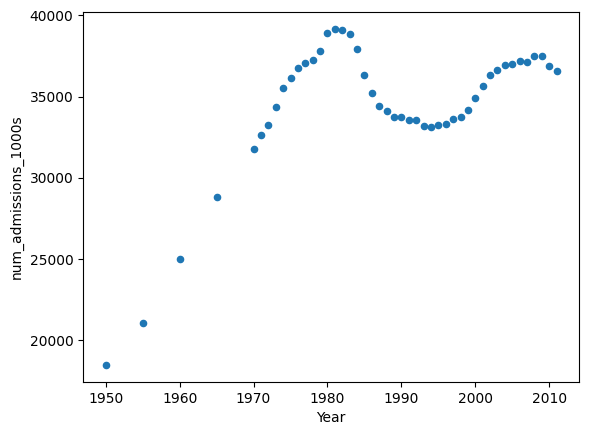

In [9]:
hospital_admissions.plot(x='Year', y='num_admissions_1000s', kind='scatter')

### Demographic Indicators

In [10]:
# read data
demographic_indicators = pd.read_excel(data_path(demographic_indicators_filename), sheet_name=0)
# remove junk rows and set header
demographic_indicators_header = demographic_indicators.iloc[15,:]
demographic_indicators = demographic_indicators.iloc[16:,:]
demographic_indicators.columns = demographic_indicators_header
# select USA data
demographic_indicators = demographic_indicators.loc[demographic_indicators['Region, subregion, country or area *'] == 'United States of America']
# select relevant columns
demographic_cols = [
    'Year',
    'Total Population, as of 1 July (thousands)',
    'Male Population, as of 1 July (thousands)',
    'Female Population, as of 1 July (thousands)',
]
demographic_indicators = demographic_indicators[demographic_cols]
# set dates
demographic_indicators = demographic_indicators.loc[(demographic_indicators['Year'] >= 1950) & (demographic_indicators['Year'] <= 2011)]

In [11]:
demographic_indicators

15,Year,"Total Population, as of 1 July (thousands)","Male Population, as of 1 July (thousands)","Female Population, as of 1 July (thousands)"
18524,1950,148281.55,73516.095,74765.455
18525,1951,150598.453,74784.499,75813.955
18526,1952,152941.727,76079.283,76862.444
18527,1953,155451.199,77221.443,78229.756
18528,1954,158205.873,78577.893,79627.98
...,...,...,...,...
18581,2007,302743.399,149147.06,153596.338
18582,2008,305694.91,150592.791,155102.12
18583,2009,308512.035,151968.684,156543.351
18584,2010,311182.845,153272.866,157909.979


### Cancer Death Rates (per 100,000 population)

In [12]:
cancer_death = pd.read_csv(data_path(cancer_death_filename))
cancer_death = cancer_death.loc[(cancer_death['Year'] >= 1950) & (cancer_death['Year'] <= 2011)]
cancer_death

,Entity,Year,Stomach (male),Colon and Rectum (male),Liver (male),Pancreas (male),Lung and Bronchus (male),Prostate (male),Leukemia (male),Stomach (female),Colon and Rectum (female),Pancreas (female),Lung and Bronchus (female),Breast (female),Uterus (female),Liver (female)
20,United States,1950,31.1,33.1,8.6,9.9,24.3,28.9,8.2,17.6,32.3,6.8,5.8,31.9,26.2,9.8
21,United States,1951,29.7,32.3,8.3,10.3,25.8,28.6,8.7,16.5,31.9,6.7,5.9,31.6,24.5,9.4
22,United States,1952,28.7,32.8,8.1,10.4,28.0,29.7,8.8,16.1,31.5,7.1,6.1,31.6,23.8,9.5
23,United States,1953,28.1,33.0,8.0,10.7,30.4,29.8,9.1,15.6,31.4,7.1,6.0,32.2,23.6,9.2
24,United States,1954,27.3,32.6,7.7,11.2,31.7,30.5,9.4,14.8,31.2,7.3,6.0,31.8,22.5,8.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,United States,2007,5.0,20.7,8.9,12.6,65.4,24.2,9.5,2.6,14.6,9.5,40.2,23.0,6.6,4.4
78,United States,2008,4.9,20.1,9.3,12.5,63.9,23.0,9.5,2.5,14.3,9.7,39.2,22.6,6.6,4.4
79,United States,2009,4.7,19.5,9.6,12.4,61.7,22.1,9.5,2.4,13.6,9.5,38.7,22.2,6.5,4.5
80,United States,2010,4.6,19.2,9.7,12.7,60.3,21.8,9.3,2.5,13.3,9.6,38.0,21.9,6.7,4.7


### Alcohol Expenditure

In [13]:
alcohol_expenditure = pd.read_csv(data_path(alcohol_expenditure_filename))
alcohol_expenditure = alcohol_expenditure.loc[(alcohol_expenditure['Year'] >= 1950) & (alcohol_expenditure['Year'] <= 2011)]
alcohol_expenditure

,Entity,Year,"Liquor stores (at home) (USDA, 2018)","Food stores (at home) (USDA, 2018)","Other (at home) (USDA, 2018)","Total (at home) (USDA, 2018)","Restaurants & bars (away from home) (USDA, 2018)","Hotels & motels (away from home) (USDA, 2018)","All other (away from home) (USDA, 2018)",Total (away from home),"Total alcohol expenditure (USDA, 2018)"
15,United States,1950,2399000000,569000000,487000000,3455000000,4028000000,259000000,126000000,4413000000,7868000000
16,United States,1951,2646000000,617000000,526000000,3789000000,4341000000,272000000,152000000,4765000000,8554000000
17,United States,1952,2786000000,668000000,545000000,3999000000,4442000000,281000000,176000000,4899000000,8898000000
18,United States,1953,2830000000,698000000,552000000,4080000000,4482000000,282000000,196000000,4960000000,9040000000
19,United States,1954,2942000000,685000000,562000000,4189000000,4454000000,274000000,218000000,4946000000,9135000000
...,...,...,...,...,...,...,...,...,...,...,...
72,United States,2007,36791453462,19544982269,13406220985,69742656717,53201428588,4729968000,10060603412,67992000000,137734656717
73,United States,2008,38017899574,20336378880,20677005594,79031284048,54826533785,4821849000,10235617215,69884000000,148915284048
74,United States,2009,39025302989,20297321044,18979899808,78302523841,53988953003,4668705000,9997341997,68655000000,146957523841
75,United States,2010,40244994481,20728382105,20325518116,81298894701,55153264810,4721220000,10182515190,70057000000,151355894701


### Air Pollution

In [14]:
# read data
air_pollution = pd.read_csv(data_path(air_pollution_filename), low_memory=False)
# select USA data
air_pollution = air_pollution.loc[air_pollution['Entity'] == 'United States']
# fix column dtype
air_pollution['nh3_per_capita'] = pd.to_numeric(air_pollution['nh3_per_capita'])
# select dates 
air_pollution = air_pollution.loc[(air_pollution['Year'] >= 1950) & (air_pollution['Year'] <= 2011)]
air_pollution

,Entity,Year,nox,so2,co,oc,nmvoc,bc,nh3,nox_per_capita,so2_per_capita,co_per_capita,oc_per_capita,nmvoc_per_capita,bc_per_capita,nh3_per_capita
44965,United States,1950,1.395455e+07,1.807060e+07,1.048902e+08,971897.527932,1.690686e+07,595505.713902,1.475248e+06,87.872567,113.791573,660.499190,6.120093,106.463437,3.749932,9.289717
44966,United States,1951,1.484601e+07,1.893139e+07,1.095868e+08,916771.122937,1.789994e+07,563353.250626,1.539566e+06,92.284438,117.679654,681.203964,5.698752,111.268008,3.501867,9.570112
44967,United States,1952,1.504102e+07,1.815566e+07,1.111685e+08,866243.601679,1.830056e+07,526039.132526,1.590965e+06,92.125837,111.202933,680.903893,5.305718,112.090448,3.221975,9.744620
44968,United States,1953,1.546156e+07,1.856698e+07,1.145878e+08,802384.136965,1.894835e+07,486947.176539,1.650191e+06,93.192457,111.909954,690.662295,4.836261,114.208577,2.935008,9.946302
44969,United States,1954,1.529030e+07,1.735779e+07,1.137432e+08,755303.796163,1.894967e+07,448050.945479,1.688582e+06,90.616479,102.869296,674.088049,4.476236,112.303428,2.655331,10.007221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45022,United States,2007,1.534428e+07,1.052998e+07,5.759340e+07,433209.729931,1.402034e+07,230375.528238,3.710534e+06,51.044070,35.028901,191.589438,1.441110,46.639890,0.766364,12.343414
45023,United States,2008,1.402263e+07,9.305276e+06,5.149972e+07,437246.905132,1.270438e+07,220671.202997,3.772066e+06,46.205199,30.661300,169.693891,1.440748,41.861489,0.727121,12.429127
45024,United States,2009,1.289023e+07,8.163446e+06,4.365374e+07,425217.561111,1.243358e+07,202696.258036,3.732191e+06,42.082630,26.651141,142.516053,1.388205,40.591800,0.661741,12.184456
45025,United States,2010,1.201656e+07,7.000108e+06,4.138994e+07,442252.211556,1.243886e+07,210570.137629,3.692314e+06,38.887107,22.653231,133.943067,1.431184,40.253708,0.681431,11.948792


In [15]:
# Data is number in thousands. We want rate. Need to multiply by 1000 and divide by population. Data is recorded every 5 years from 1950 to 1970. We will need to fill the missing values (pandas interpolation).

hospital_admissions = hospital_admissions.set_index('Year')
demographic_indicators = demographic_indicators.set_index('Year')
cancer_death = cancer_death.set_index('Year')
alcohol_expenditure = alcohol_expenditure.set_index('Year')
air_pollution = air_pollution.set_index('Year')

In [16]:
hospital_admissions.head()

,num_admissions_1000s
Year,
1950,18483.0
1955,21073.0
1960,25027.0
1965,28812.0
1970,31759.0


In [17]:
# hospital_admissions have num_admissions_1000s. We want to convert to rate per 1000 people
hospital_admissions['num_admissions_1000s'] = hospital_admissions['num_admissions_1000s'] * 1000/ demographic_indicators['Total Population, as of 1 July (thousands)']
hospital_admissions.head()

,num_admissions_1000s
Year,
1950,124.648009
1955,130.777364
1960,142.046665
1965,151.87929
1970,158.534734


In [18]:
cancer_death.head()

,Entity,Stomach (male),Colon and Rectum (male),Liver (male),Pancreas (male),Lung and Bronchus (male),Prostate (male),Leukemia (male),Stomach (female),Colon and Rectum (female),Pancreas (female),Lung and Bronchus (female),Breast (female),Uterus (female),Liver (female)
Year,,,,,,,,,,,,,,,
1950,United States,31.1,33.1,8.6,9.9,24.3,28.9,8.2,17.6,32.3,6.8,5.8,31.9,26.2,9.8
1951,United States,29.7,32.3,8.3,10.3,25.8,28.6,8.7,16.5,31.9,6.7,5.9,31.6,24.5,9.4
1952,United States,28.7,32.8,8.1,10.4,28.0,29.7,8.8,16.1,31.5,7.1,6.1,31.6,23.8,9.5
1953,United States,28.1,33.0,8.0,10.7,30.4,29.8,9.1,15.6,31.4,7.1,6.0,32.2,23.6,9.2
1954,United States,27.3,32.6,7.7,11.2,31.7,30.5,9.4,14.8,31.2,7.3,6.0,31.8,22.5,8.7


In [35]:
# Creating a copy of cancer_death df
cancer_death_copy = cancer_death.copy()

In [36]:
cancer_death_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 1950 to 2011
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Entity                      62 non-null     object 
 1   Stomach (male)              62 non-null     float64
 2   Colon and Rectum (male)     62 non-null     float64
 3   Liver (male)                62 non-null     float64
 4   Pancreas (male)             62 non-null     float64
 5   Lung and Bronchus (male)    62 non-null     float64
 6   Prostate (male)             62 non-null     float64
 7   Leukemia (male)             62 non-null     float64
 8   Stomach (female)            62 non-null     float64
 9   Colon and Rectum (female)   62 non-null     float64
 10  Pancreas (female)           62 non-null     float64
 11  Lung and Bronchus (female)  62 non-null     float64
 12  Breast (female)             62 non-null     float64
 13  Uterus (female)             62 n

In [37]:
cancer_death_copy['Stomach (combined)'] = (cancer_death_copy['Stomach (female)'] + cancer_death_copy['Stomach (male)'])/200000
cancer_death_copy['Colon and Rectum (combined)'] = (cancer_death_copy['Colon and Rectum (female)'] + cancer_death_copy['Colon and Rectum (male)'])/200000
cancer_death_copy['Liver (combined)'] = (cancer_death_copy['Liver (female)'] + cancer_death_copy['Liver (male)'])/200000
cancer_death_copy['Pancreas (combined)'] = (cancer_death_copy['Pancreas (female)'] + cancer_death_copy['Pancreas (male)'])/200000
cancer_death_copy['Lung and Bronchus (combined)'] = (cancer_death_copy['Lung and Bronchus (female)'] + cancer_death_copy['Lung and Bronchus (male)'])/200000


In [38]:
cancer_death_copy = cancer_death_copy[['Stomach (combined)', 'Colon and Rectum (combined)', 'Liver (combined)', 'Pancreas (combined)', 'Lung and Bronchus (combined)']]
cancer_death_copy

,Stomach (combined),Colon and Rectum (combined),Liver (combined),Pancreas (combined),Lung and Bronchus (combined)
Year,,,,,
1950,0.000244,0.000327,0.000092,0.000083,0.000150
1951,0.000231,0.000321,0.000089,0.000085,0.000159
1952,0.000224,0.000322,0.000088,0.000087,0.000170
1953,0.000219,0.000322,0.000086,0.000089,0.000182
1954,0.000210,0.000319,0.000082,0.000092,0.000189
...,...,...,...,...,...
2007,0.000038,0.000176,0.000067,0.000111,0.000528
2008,0.000037,0.000172,0.000069,0.000111,0.000516
2009,0.000035,0.000166,0.000070,0.000109,0.000502


In [39]:
air_pollution.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 1950 to 2011
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Entity            62 non-null     object 
 1   nox               62 non-null     float64
 2   so2               62 non-null     float64
 3   co                62 non-null     float64
 4   oc                62 non-null     float64
 5   nmvoc             62 non-null     float64
 6   bc                62 non-null     float64
 7   nh3               62 non-null     float64
 8   nox_per_capita    62 non-null     float64
 9   so2_per_capita    62 non-null     float64
 10  co_per_capita     62 non-null     float64
 11  oc_per_capita     62 non-null     float64
 12  nmvoc_per_capita  62 non-null     float64
 13  bc_per_capita     62 non-null     float64
 14  nh3_per_capita    62 non-null     float64
dtypes: float64(14), object(1)
memory usage: 7.8+ KB


In [40]:
alcohol_expenditure.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 1950 to 2011
Data columns (total 10 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   Entity                                            62 non-null     object
 1   Liquor stores (at home) (USDA, 2018)              62 non-null     int64 
 2   Food stores (at home) (USDA, 2018)                62 non-null     int64 
 3   Other (at home) (USDA, 2018)                      62 non-null     int64 
 4   Total (at home) (USDA, 2018)                      62 non-null     int64 
 5   Restaurants & bars (away from home) (USDA, 2018)  62 non-null     int64 
 6   Hotels & motels (away from home) (USDA, 2018)     62 non-null     int64 
 7   All other (away from home) (USDA, 2018)           62 non-null     int64 
 8   Total (away from home)                            62 non-null     int64 
 9   Total alcohol expenditure (US

# Data Wrangling

#### Hospital admissions
Data is number in thousands. We want rate. Need to multiply by 1000 and divide by population. Data is recorded every 5 years from 1950 to 1970. We will need to fill the missing values (pandas interpolation).

#### Cancer Death Rates
We have rates for each cancer type split by gender. Need to clean cancer types to include only cancers that both male and females have. Calculate combined rate (e.g. sum Stomach (male) & Stomach (female) = deaths/200,000 population)

#### Alcohol Expenditure
Divide by population to get expenditure per X population.

#### Air Pollution
We will use the per capita columns.

#### Join data
After the cleaning/wrangling we join dataframes by years

# EDA

# Analysis/Modelling
